## Final Project Megafon - Purpose compare several classification models, find the best one

In [1]:
import pandas as pd
import numpy as np
import time
from dask import dataframe as dd
import dask.array as da
from datetime import datetime
from functools import reduce

### Lets prepare the train dataframe

In [2]:
df_train = pd.read_csv(r'data_train.csv')
df_train.head()

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0


In [3]:
df_train['buy_time'] = df_train['buy_time'].apply(datetime.fromtimestamp)
df_train.shape

(831653, 5)

In [4]:
df_train.head()

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,2018-09-17,0.0
1,1,1454121,4.0,2018-07-16,0.0
2,2,2458816,1.0,2018-08-13,0.0
3,3,3535012,5.0,2018-09-03,0.0
4,4,1693214,1.0,2018-09-03,0.0


In [5]:
df_train.columns

Index(['Unnamed: 0', 'id', 'vas_id', 'buy_time', 'target'], dtype='object')

In [6]:
df_train.drop(['Unnamed: 0'], axis =1, inplace=True)

In [7]:
df_train.columns

Index(['id', 'vas_id', 'buy_time', 'target'], dtype='object')

In [8]:
df_train.set_index(['id'], inplace=True)

In [9]:
df_train.head()

,vas_id,buy_time,target
id,,,
540968,8.0,2018-09-17,0.0
1454121,4.0,2018-07-16,0.0
2458816,1.0,2018-08-13,0.0
3535012,5.0,2018-09-03,0.0
1693214,1.0,2018-09-03,0.0


In [10]:
df_train.sort_index().head()

,vas_id,buy_time,target
id,,,
2,2.0,2018-12-24,0.0
4,1.0,2018-08-06,0.0
15,1.0,2018-08-13,0.0
16,2.0,2018-10-29,0.0
29,1.0,2018-08-06,0.0


In [11]:
type(df_train.index)

pandas.core.indexes.numeric.Int64Index

In [12]:
path = r"C:\Users\vmakh\OneDrive\Desktop\Python-20220419T075236Z-001\Python\Мегафон\features.csv"
dask_df = dd.read_csv(path, delimiter='\t')
dask_df.head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [13]:
# Filter 

dask_df.columns



Index(['Unnamed: 0', 'id', 'buy_time', '0', '1', '2', '3', '4', '5', '6',
       ...
       '243', '244', '245', '246', '247', '248', '249', '250', '251', '252'],
      dtype='object', length=256)

In [14]:
dask_df = dask_df.drop(['Unnamed: 0', 'buy_time'],axis=1)

In [15]:
dask_df.dtypes

id       int64
0      float64
1      float64
2      float64
3      float64
        ...   
248    float64
249    float64
250    float64
251    float64
252    float64
Length: 254, dtype: object

In [16]:
n_of_partitions=100
d_frames=[]
for n in range(n_of_partitions):
    df_part= dask_df.partitions[n].compute()
    df_part = df_part.set_index('id')
    df_part=df_part.astype('float16')
    dff=pd.merge(df_train, df_part, left_index=True, right_index=True)
    d_frames.append(dff)

In [17]:
len(d_frames)

100

In [18]:
ndf_train=reduce(lambda a,b: pd.concat([a, b], axis=0), d_frames)

In [32]:
ndf_train.shape

(245580, 256)

In [47]:
ndf_train = ndf_train.sort_index(ascending=True)
ndf_train.head()

,vas_id,buy_time,target,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
id,,,,,,,,,,,,,,,,,,,,,
4,1.0,2018-08-06,0.0,-96.81250,-323.500,-110.75000,-376.000,-116.1875,-397.250,-16.09375,...,4808.0,4140.0,-26.000000,-37.625,-35.75,-20.828125,-0.694336,-7.175781,-0.456055,0.0
30,7.0,2018-10-15,0.0,-82.37500,162.500,-83.62500,186.250,-86.5000,167.625,-16.09375,...,-962.5,-614.0,-24.000000,-37.625,-252.75,-23.828125,-0.694336,-10.179688,-0.456055,1.0
37,1.0,2018-08-20,0.0,-96.81250,-408.250,-110.75000,-460.750,-116.1875,-482.000,-16.09375,...,-977.5,-614.0,-26.000000,-37.625,-306.75,-25.828125,-0.694336,-12.179688,-0.456055,0.0
48,1.0,2018-08-27,0.0,-87.06250,-94.625,-101.00000,-145.500,-106.4375,-166.625,-16.09375,...,-887.5,-614.0,-26.000000,-37.625,-231.75,-4.832031,-0.694336,8.820312,-0.456055,0.0
122,2.0,2018-12-31,0.0,40.46875,209.625,34.15625,203.625,28.7500,182.500,60.18750,...,1590.0,1022.0,-5.996094,-21.625,39.25,-15.835938,-0.694336,-2.175781,-0.456055,0.0


In [85]:
type(ndf_train.loc[4,'3'])

numpy.float16

In [25]:
ndf_train.isnull().values.any()

False

### Let's find out which features really matter

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [120]:
X = ndf_train.drop(['target', 'buy_time'], axis =1) 
y = ndf_train['target']  

In [121]:
X.max()

vas_id        9.0
0         29008.0
1         36480.0
2         29024.0
3         36448.0
           ...   
248       32464.0
249        1306.0
250       32480.0
251        1333.0
252         283.0
Length: 254, dtype: float64

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245580 entries, 4 to 4362640
Columns: 254 entries, vas_id to 252
dtypes: float16(253), float64(1)
memory usage: 130.3 MB


In [123]:
col_name = X.columns.to_series()[np.isinf(X).any()] # get rid of columns containing infinite values
l=list(col_name)

In [124]:
X = X.drop(l,axis=1)
X.head()

,vas_id,0,1,2,3,4,5,6,7,8,...,238,239,241,242,246,248,249,250,251,252
id,,,,,,,,,,,,,,,,,,,,,
4,1.0,-96.81250,-323.500,-110.75000,-376.000,-116.1875,-397.250,-16.09375,19.671875,-6.785156,...,-247.125,-108.43750,-106.625000,257.750000,-37.625,-20.828125,-0.694336,-7.175781,-0.456055,0.0
30,7.0,-82.37500,162.500,-83.62500,186.250,-86.5000,167.625,-16.09375,-65.062500,-6.785156,...,-247.125,-45.40625,-0.618164,-17.296875,-37.625,-23.828125,-0.694336,-10.179688,-0.456055,1.0
37,1.0,-96.81250,-408.250,-110.75000,-460.750,-116.1875,-482.000,-16.09375,-65.062500,-6.785156,...,-247.125,-108.43750,-106.625000,-17.296875,-37.625,-25.828125,-0.694336,-12.179688,-0.456055,0.0
48,1.0,-87.06250,-94.625,-101.00000,-145.500,-106.4375,-166.625,-16.09375,-65.062500,-6.785156,...,269.000,-108.43750,-82.625000,-17.296875,-37.625,-4.832031,-0.694336,8.820312,-0.456055,0.0
122,2.0,40.46875,209.625,34.15625,203.625,28.7500,182.500,60.18750,278.000000,19.781250,...,3718.000,-108.43750,-106.625000,-5.296875,-21.625,-15.835938,-0.694336,-2.175781,-0.456055,0.0


In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245580 entries, 4 to 4362640
Columns: 219 entries, vas_id to 252
dtypes: float16(218), float64(1)
memory usage: 113.9 MB


In [119]:
col_name = X.columns.to_series()[np.isinf(X).any()]
col_name

Series([], dtype: object)

[1.95091642e-01 6.77878689e-03 9.73446810e-03 7.32964222e-03
 9.84194857e-03 7.20385706e-03 9.72435926e-03 2.76342037e-03
 5.83575671e-03 2.45916498e-03 4.73706033e-03 1.50277621e-03
 2.24404511e-03 1.38432580e-03 5.47635928e-03 6.49870060e-03
 5.38249322e-08 5.41655074e-06 2.76581246e-05 2.01365324e-03
 4.84677092e-03 7.09788936e-03 2.19921636e-03 2.08696040e-04
 0.00000000e+00 3.54099510e-07 3.06208925e-03 2.27334323e-03
 1.08681104e-03 3.93552389e-03 3.43175042e-03 4.00158616e-03
 1.88190471e-04 1.27760279e-07 2.11126596e-07 2.08176079e-03
 2.63747220e-05 3.31930780e-03 7.55497144e-03 7.55516409e-03
 6.95908862e-03 2.65810204e-03 8.80772959e-03 8.76947817e-03
 1.05354732e-02 9.99554551e-03 5.78520418e-03 8.15205227e-03
 4.84395926e-03 3.23941958e-04 9.41761238e-03 8.84804043e-03
 7.01540560e-03 7.73613911e-03 7.35540478e-03 7.12602563e-03
 7.70785921e-03 1.75966153e-03 1.81232951e-03 3.07423843e-03
 3.20804575e-03 2.29925707e-03 4.08457510e-03 1.56370976e-03
 1.36275743e-03 1.785624

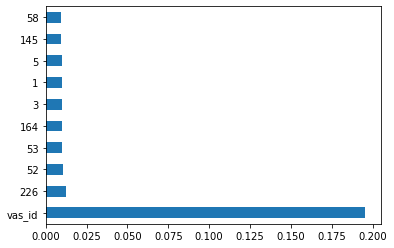

In [129]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [130]:
#bestfeatures = SelectKBest(score_func=chi2, k=20)
#fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(20,'Score'))

In [139]:
top_feats=list(feat_importances.nlargest(10).index)
top_feats

['vas_id', '226', '52', '53', '164', '3', '1', '5', '145', '58']

In [140]:
X=X[top_feats]
X.head()

,vas_id,226,52,53,164,3,1,5,145,58
id,,,,,,,,,,
4,1.0,14.562500,-57.156250,-25.328125,-0.279541,-376.000,-323.500,-397.250,-40.96875,-26.687500
30,7.0,-2.101562,112.812500,33.656250,0.100464,186.250,162.500,167.625,-29.96875,-15.679688
37,1.0,-17.093750,-77.187500,-29.328125,-0.679688,-460.750,-408.250,-482.000,-42.96875,-32.687500
48,1.0,5.757812,-39.156250,-21.328125,0.140503,-145.500,-94.625,-166.625,31.03125,34.312500
122,2.0,-12.945312,-16.171875,24.671875,-0.029510,203.625,209.625,182.500,20.03125,15.320312


### Let's determine which model is the best

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [145]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [150]:
continuous_columns = list(X.columns)
categorical_columns = []

In [151]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))

In [152]:
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [153]:
pipeline_1 = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

In [154]:
pipeline_2 = Pipeline([
    ('features',feats),
    ('classifier', GradientBoostingClassifier(random_state = 42)),
])

In [155]:
pipeline_3 = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
])

In [156]:
methods=['RandomForestClassifier','GradienBoostingClassifier','LogisticRegression']
pipeline_all=[pipeline_1,pipeline_2, pipeline_3]
preds=[pr.fit(X_train, y_train).predict_proba(X_test)[:, 1] for pr in pipeline_all ]
pips={k:p for k,p in zip(methods, preds)}
for key, value in pips.items():
    print(key, ' : ', value[:10])

RandomForestClassifier  :  [0.0425     0.02833333 0.67       0.03       0.025      0.03
 0.03       0.01       0.00333333 0.03      ]
GradienBoostingClassifier  :  [0.02250601 0.02012386 0.3883544  0.01899381 0.01788505 0.01882047
 0.01761632 0.01881887 0.0174191  0.01918884]
LogisticRegression  :  [0.2576457  0.12957113 0.18188995 0.04008577 0.03989625 0.02659091
 0.0258234  0.02666586 0.02575469 0.02663167]


In [164]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [158]:
metrix=[]
names=['Threshold', 'F-Score', 'Precision', 'Recall']
for pp in pips.values():
    precision,recall,thresholds = precision_recall_curve(y_test, pp)
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    m={k:v for k,v in zip(names,[thresholds[ix],fscore[ix],precision[ix],recall[ix]])}
    metrix.append(m)   
   
md={k:v for k, v in zip(methods,metrix)}

df=pd.DataFrame(md)
df

,RandomForestClassifier,GradienBoostingClassifier,LogisticRegression
Threshold,0.133333,0.215908,0.162671
F-Score,0.427397,0.456605,0.347091
Precision,0.302234,0.327236,0.288388
Recall,0.729503,0.755138,0.435801


### GradientBoostingClassifier is the Winner!

#### Let's plot the ROC curve of the Winner

In [163]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cv_scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
cv_score = np.mean(cv_scores)
print('CV score is {}'.format(cv_score))

CV score is 0.8413830020362821


In [169]:
b=2.55

precision, recall, thresholds = precision_recall_curve(y_test.values, y_pred)
fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.000000, F-Score=0.374, Precision=0.074, Recall=1.000


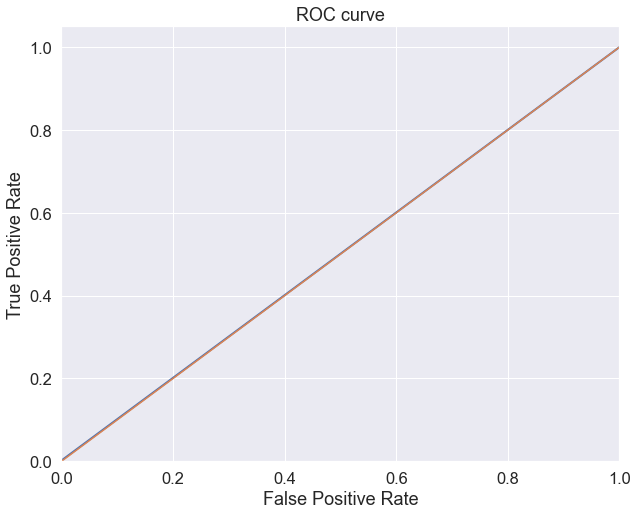

In [168]:
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### BAD TIMES!!! Even the best model sucks....

### Sorryyy....